# Seaborn

* Seaborn yra duomenų vizualizacijos biblioteka. 
* Ji sukurta Matplotlib pagrindu.
* Stilistiškai kiek išbaigtesnė už Matplotlib.
* Labai gerai veikia su pandas DataFrame'ais.
* Labai plačiai naudojama duomenų analizėje.
* Dokumentaciją rasite [čia](https://seaborn.pydata.org/).

diegiasi *conda install seaborn*, arba *pip install seaborn*

In [67]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
%matplotlib inline

Dažnai duomenų analizės bibliotekos turi integruotus dataset'us, demonstraciniams tikslams. Pasinaudokime vienu iš jų:

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

### Pasiskirstymo grafikai

Jų pagalba matysime, koks yra kokionors vieno rodiklio pasiskirstymas.

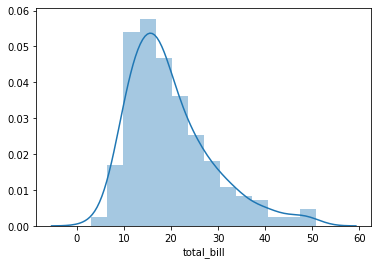

In [10]:
sns.distplot(tips['total_bill'])

parametras **kde** gali nuimti lijiną, o parametras **bins** padidinti stulpelių skaičių.

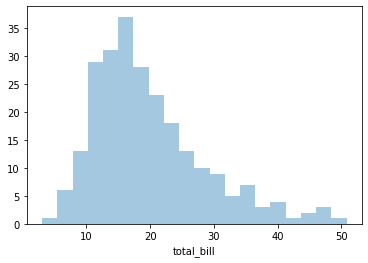

In [11]:
sns.distplot(tips['total_bill'], kde=False, bins=20)

Matome kad dažniausiai sąskaitos išrašomos tarp 10 ir 20$.

### .jointplot()

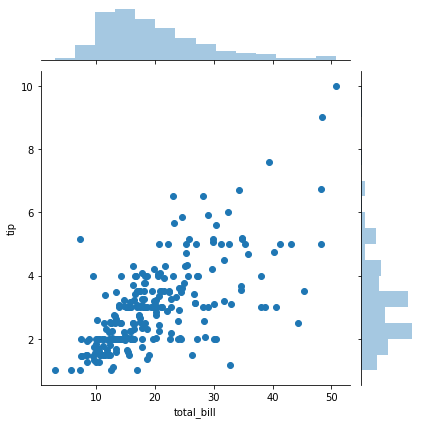

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips)

Matome, koks yra sąntykio tarp 'total_bill' ir 'tip' pasiskirstymas.  

Rezultatą galime koreguoti su parametru **kind**:

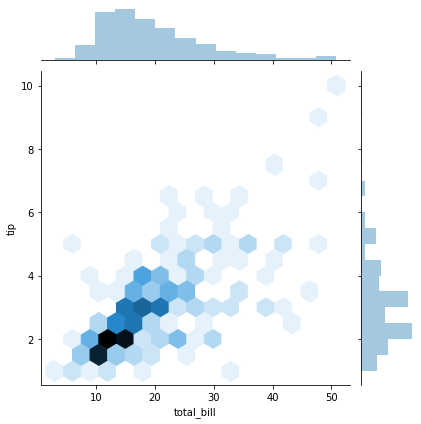

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

reikšmė 'reg' stengiasi nubrėžti mums liniją, kuri atspindėtų tendenciją.

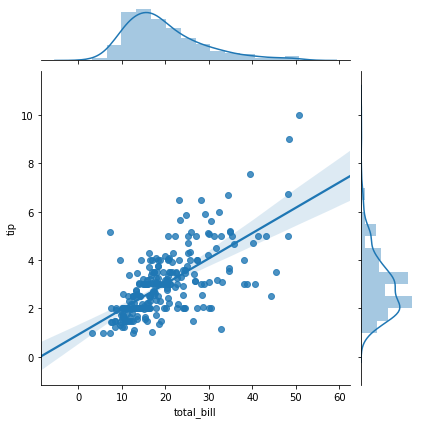

In [16]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

taip pat galime naudoti **kind** su 'kde' reikšme. Tokiu atveju matysime didžiausias intensyvumo zonas:

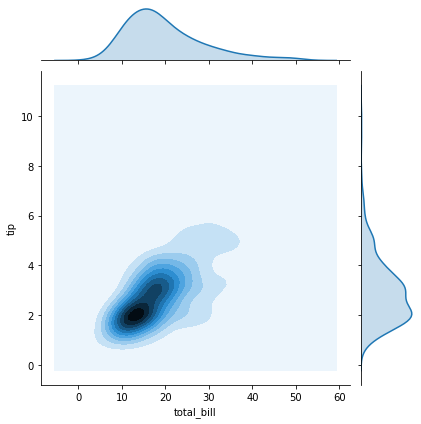

In [18]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

### .pairplot()
duoda mums visas įmanomas .jointplot kombinacijas lentelėje:

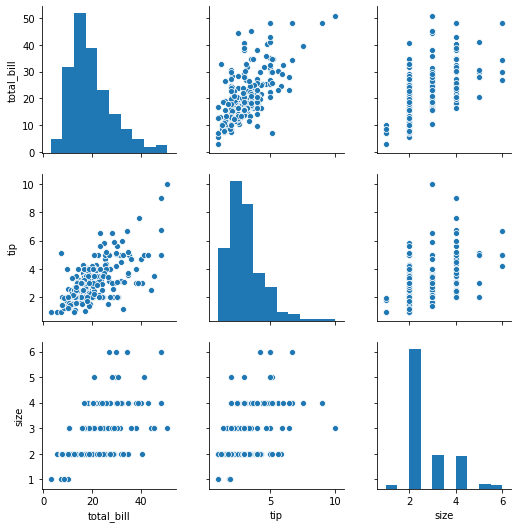

In [20]:
sns.pairplot(tips)

pvz, dešinys-apatinis grafikas yra ne kas kita, kaip:

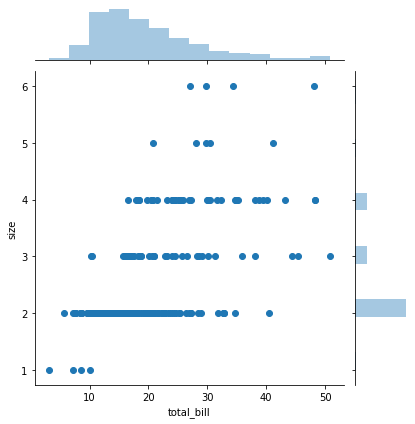

In [24]:
sns.jointplot(x='total_bill', y='size', data=tips)

parametras **hue** išskiria kategorines reikšmes, pvz.:

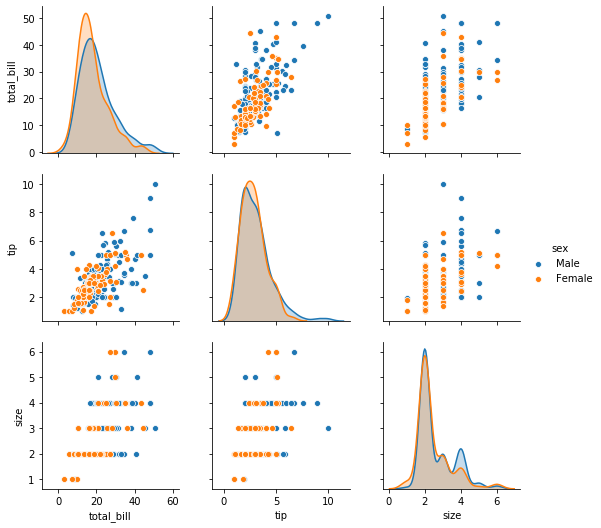

In [27]:
sns.pairplot(tips, hue='sex')

dabar turime skirtingų spalvų taškus, kur oranžinė spalva reprezentuoja moteris.

### Kategorizavimo grafikai

**.barplot()** išskirsto kategorijas pagal kurį nors rodiklį ir leidžia tam rodikliui taikyi kokią nors funkciją:

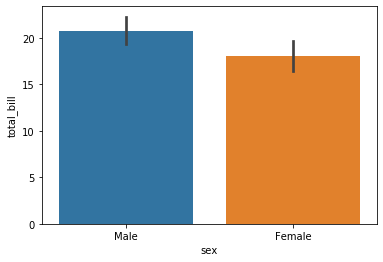

In [36]:
sns.barplot(x='sex', y='total_bill', data=tips)

Jeigu mes nenurodome, kokia ta funkcija, numatyta reikšmė yra vidurkis. Taigi šiame pavyzdyje matome sąskaitos vidurkių pasiskirstymą tarp lyčių. Jeigu norime nurodyti vidurkį, turime naudoti **estimator** parametrą, pvz.:

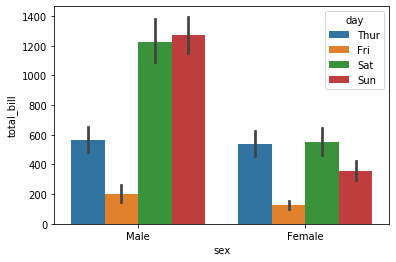

In [43]:
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)

Šiuo atveju matome bendras sumas. Taip pat panaudojome *hue*, tokiu būdu rezultatą išskirstydami savaitės dienomis. *Nekreipkite dėmesio į juodas linijas, jos yra error bars, rodo statistinį skaičiavimo patikimumą, ir nėra mums aktualios* 

### .countplot() tiesiog suskaičiuoja kategorijas:

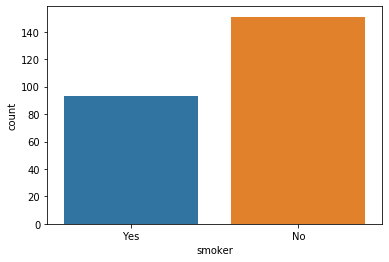

In [45]:
sns.countplot(x='smoker', data=tips)

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### .boxplot()

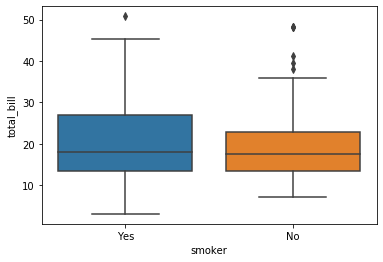

In [53]:
sns.boxplot(x='smoker', y='total_bill', data=tips)

Kas yra *boxplot*? Iš esmės tai į ketvirtadalius sugrupuota informacija. Mūsų pavyzdyje matosi, kad rūkalių viršutinis ketvirtadalis maistui išleido nuo ~28 iki ~46, kai tuo tarpu nerūkančiųjų viršutinis ketvirtadalis išleido nuo ~24 iki ~37. Taškai viršuje yra išimtys. Jie pasitaiko per retai, kad būtų įtraukti į ketvirtadalius.

![](http://web.pdx.edu/~stipakb/download/PA551/boxplot_files/boxplot4.jpg)

Šis paveikslėlis paaiškina boxplot atvaizdavimą.

### .heatmap() 

pandas turi metodą, kuris parodo skaičių koreliacijas lentelėje:

In [56]:
koreliacijos = tips.corr()

In [57]:
koreliacijos

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


čia turime koreliacijų matricą. Ji rodo, pvz, kaip arbatpinigiai koreliuoja su sąskaitos dydžiu. Kad būtų lengviau skaityti, atsispausdinkime vizualizaciją:

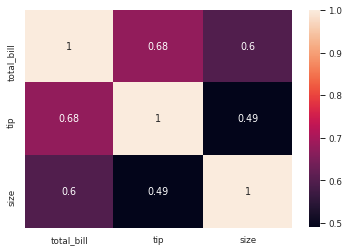

In [81]:
sns.heatmap(koreliacijos, annot=True)

### .FacetGrid()

**.FacetGrid()** leidžia susikurti lentelę, kurią vėliau reikės užpildytyi lentelėmis. Pvz.:

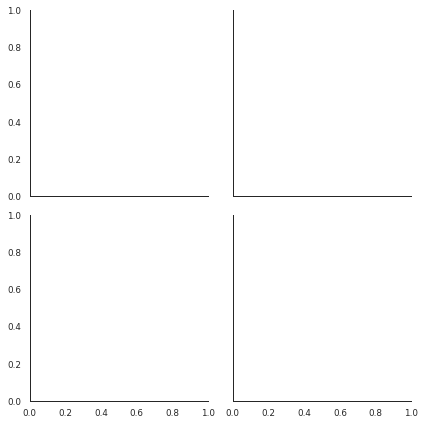

In [82]:
sns.FacetGrid(data=tips, col='time', row ='smoker')

O pats užpildymas atrodo taip:

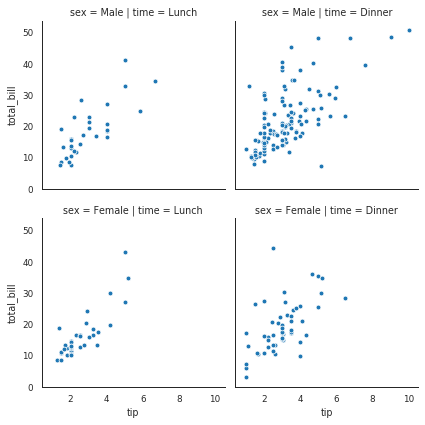

In [93]:
g = sns.FacetGrid(data = tips, col='time', row='sex')
g.map(sns.scatterplot, 'tip', 'total_bill')

Taip išskirstėme atvaizdavimą į keturias lenteles. Vienoje pavaizduotos moterys per pietus, kitoje moterys per vakarienę ir t.t.

### Stilius ir spalvos

### .set_style()

Seaborn leidžia nustatyti stilių su **.set_style()** metodu. Į parametrus reikia įkelti vieną iš šių reikšmių - darkgrid, whitegrid, dark, white, ticks.

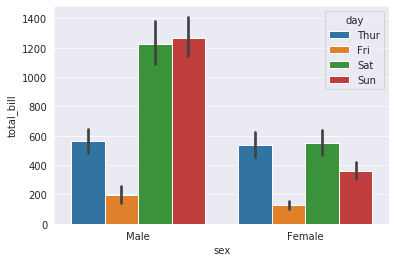

In [65]:
sns.set_style('darkgrid')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)


### .despine()

Nuima viršutinį ir dešinį rėmą.

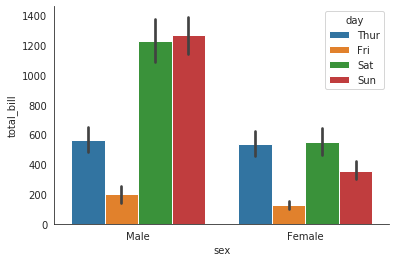

In [66]:
sns.set_style('white')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)
sns.despine()

### palette parametras
leidžia pasirinkti vieną iš paruoštų naudoti spalvų palečių. Jas rasite [čia](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#classes-of-colormaps).

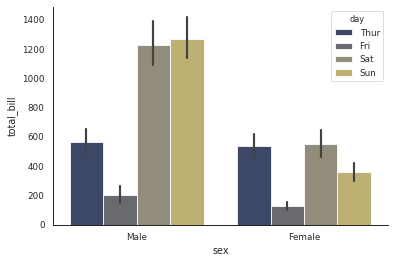

In [80]:
sns.set_style('white')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum, palette='cividis')
sns.despine()

Rekomendacija: pasitikrinti galimus įvairių metodų parametrus galite kursoriui mirksint skliaustelių viduje, spaudžiant *Shift+Tab*. Nevenkite eksperimentuoti :) 